In [1]:
# 1-Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Configuración visual
sns.set_theme(style="whitegrid")


In [3]:
# Cargar los datos
try:
    data = pd.read_csv('./data/Default.csv', sep='\t')
    print("Datos cargados correctamente.")
except FileNotFoundError:
    print("El archivo 'Default.csv' no fue encontrado.")

display(data.head())


Datos cargados correctamente.


,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


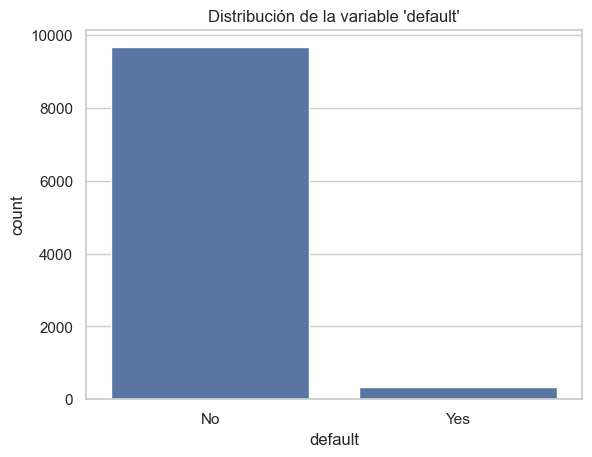

In [4]:
# Distribución de la variable objetivo
sns.countplot(data=data, x='default')
plt.title("Distribución de la variable 'default'")
plt.show()


In [5]:
data.default.value_counts()


default
No     9667
Yes     333
Name: count, dtype: int64

In [6]:
# Codificar la variable categórica 'student'
data = pd.get_dummies(data, columns=['student'], drop_first=True, dtype=int)

# Seleccionar variables predictoras y objetivo
X = data[['balance', 'income', 'student_Yes']]
y = data['default']


In [7]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)


In [8]:
# Entrenar el modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)


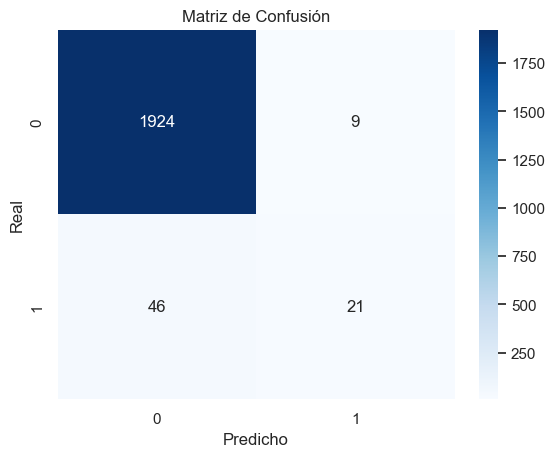

Accuracy: 0.9725

Reporte de clasificación:
              precision    recall  f1-score   support

          No       0.98      1.00      0.99      1933
         Yes       0.70      0.31      0.43        67

    accuracy                           0.97      2000
   macro avg       0.84      0.65      0.71      2000
weighted avg       0.97      0.97      0.97      2000



In [9]:
# Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# Métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


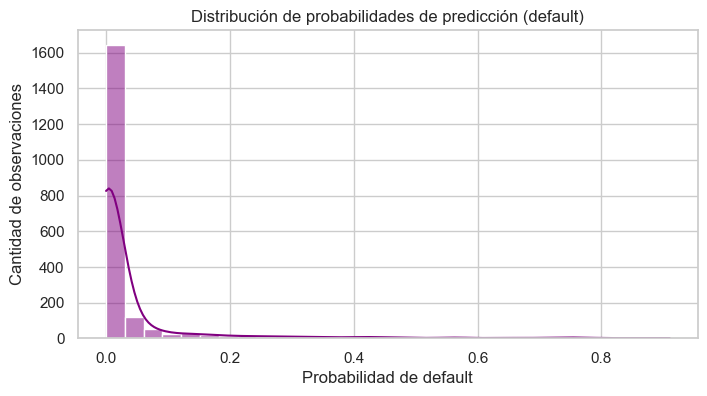

In [10]:
# Obtener las probabilidades de que el modelo prediga "default = Yes"
# [:, 1] se refiere a la segunda columna que representa la clase positiva
y_probs = model.predict_proba(X_test)[:, 1]

# Visualizamos la distribución de esas probabilidades
plt.figure(figsize=(8, 4))
sns.histplot(y_probs, bins=30, kde=True, color='purple')
plt.title("Distribución de probabilidades de predicción (default)")
plt.xlabel("Probabilidad de default")
plt.ylabel("Cantidad de observaciones")
plt.grid(True)
plt.show()

# Esta gráfica nos permite ver cuán confiado está el modelo al predecir default


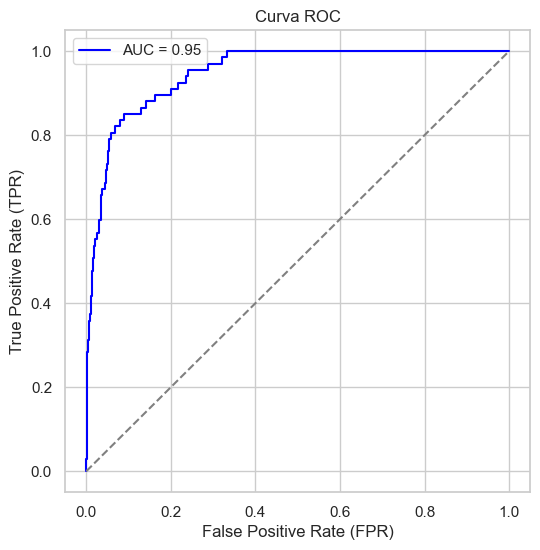

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score

# Convertimos las etiquetas a 0 y 1 para usar ROC
# 'No' → 0, 'Yes' → 1
y_test_bin = y_test.map({'No': 0, 'Yes': 1})

# Calculamos los valores necesarios para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_bin, y_probs)

# Calculamos el AUC (Area Under Curve)
auc = roc_auc_score(y_test_bin, y_probs)

# Graficamos la curva ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # línea aleatoria
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.show()

# Cuanto más cerca esté la curva del vértice superior izquierdo, mejor el modelo
# AUC mide qué tan bien separa el modelo las clases (0.5 = aleatorio, 1 = perfecto)
